Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [1]:
# !git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [2]:
import matplotlib.pyplot as plt
import os, shutil

In [3]:
# !pip install -r requirements.txt

# Datasets

In [4]:
dataset_path = "pytorch-CycleGAN-and-pix2pix/datasets/paired_photo2vangogh/"
if not os.path.exists(dataset_path):
    os.mkdir(dataset_path)
    
testA = dataset_path + "testA"
if not os.path.exists(testA):
    os.mkdir(testA)
    
testB = dataset_path + "testB"
if not os.path.exists(testB):
    os.mkdir(testB)
    
for img in os.listdir("dataset/photos"):
    shutil.copy2("dataset/photos/"+img, testB)
    
for img in os.listdir("dataset/paintings"):
    shutil.copy2("dataset/paintings/"+img, testA)

In [5]:
os.chdir('pytorch-CycleGAN-and-pix2pix/')

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [6]:
!bash ./scripts/download_cyclegan_model.sh style_vangogh

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_vangogh]
for details.

--2022-01-06 13:56:27--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_vangogh.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_vangogh_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43,46M  2,68MB/s    in 14s     

2022-01-06 13:56:41 (3,07 MB/s) - ‘./checkpoints/style_vangogh_pretrained/latest_net_G.pth’ saved [45575747/45575747]

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [9]:
!python test.py --dataroot datasets/paired_photo2vangogh/testB --name style_vangogh_pretrained --model test --no_dropout --num_test 36 --direction BtoA

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/paired_photo2vangogh/testB	[default: None]
             dataset_mode: single                        
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0       

# Visualize

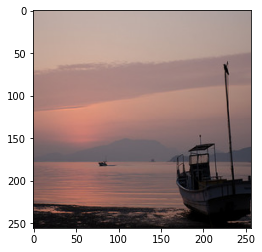

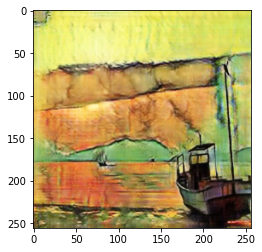

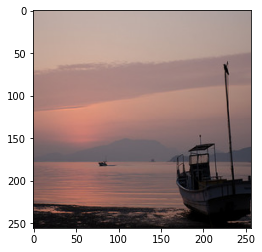

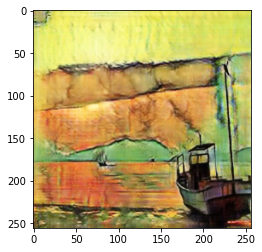

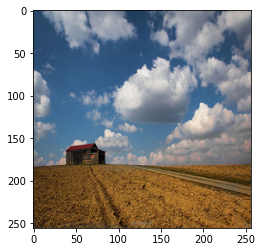

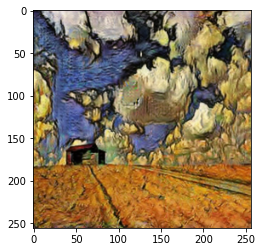

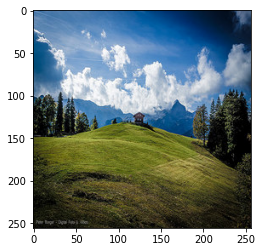

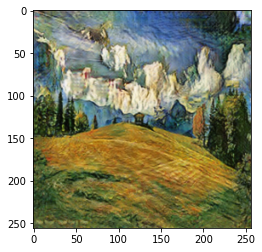

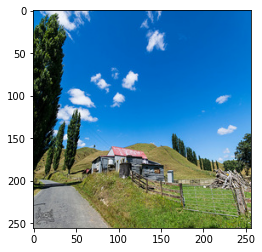

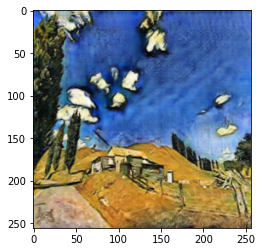

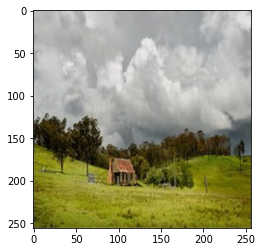

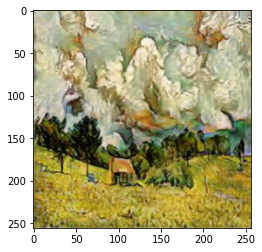

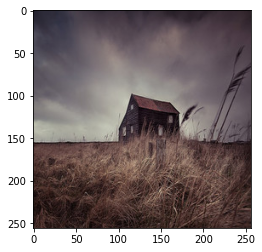

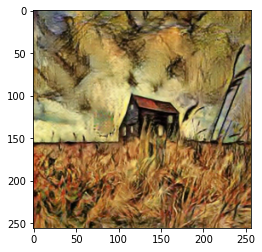

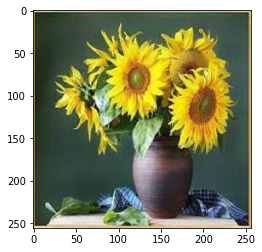

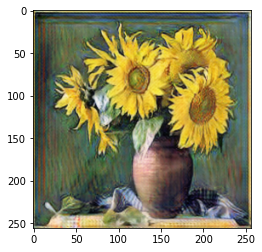

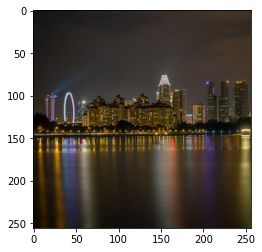

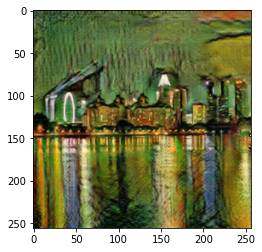

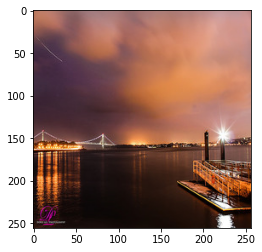

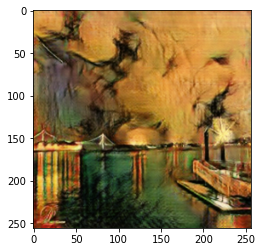

In [10]:
results_dir = "./results/style_vangogh_pretrained/test_latest/images"

fake_images = [x for x in os.listdir(results_dir) if 'fake' in x]
real_images = [x for x in os.listdir(results_dir) if 'real' in x]

fake_images.sort()
real_images.sort()

for i in range(10, 20):
    # display real image
    img = plt.imread(os.path.join(results_dir, real_images[i]))
    plt.imshow(img)
    plt.show()

    # display fake image
    img = plt.imread(os.path.join(results_dir, fake_images[i]))
    plt.imshow(img)
    plt.show()